In [1]:
import pandas as pd

C:\Users\chara\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_excel('test_data.xlsx')

# Load the data and explore it top get a feel of whats going on here 

In [3]:
pd.set_option("display.precision", 2)
pd.set_option("display.max.columns", None)

In [4]:
df.head()

,Line type,Elemnt id,Structure,Element Status,Franch base name,French Attribute name,Other french name,Category code,French Tags,French Unit,Contributor,Program,Program url,Source,Location,sub location,creation date,last update date,validity period,Uncertainty,Reglementations,Transparency,Quality,Quality TeR,Quality GR,Quality TiR,Quality C,Quality P,Quality M,French comment,Emission Type,French emission type name,unaggregated total,CO2f,CH4f,CH4b,N2O,Additional gaz 1,Additional gaz value 1,Additional gaz 2,Additional gaz value 2,Additional gaz 3,Additional gaz value 3,Additional gaz 4,Additional gaz value 4,Additional gaz 5,Additional gaz value 5,Other Greenhouse Gas,CO2b
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,3.53e-01,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,0.34,3.44e-01,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amont,NaN,0.03,9.70e-03,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4278.00,4.09e+03,189.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,3977.00,3.98e+03,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [5]:
df.shape

(14380, 49)

## Initial observations
1. I see this looks like environmental data with emissions in it.
2. Not sure what the Line type and element id means
3. Could be emissions information for a company?

## Lets pull some stats before jumping to further conclusions

### Looking at text columns to identify categorical and other data points

In [6]:
import numpy as np
df.describe(include=object)

,Line type,Structure,Element Status,Franch base name,French Attribute name,Other french name,Category code,French Tags,French Unit,Contributor,Program,Program url,Source,Location,sub location,creation date,last update date,validity period,Uncertainty,Reglementations,Transparency,Quality,Quality TeR,Quality GR,Quality TiR,Quality C,Quality P,Quality M,French comment,Emission Type,French emission type name,Additional gaz 1
count,14380,14380,14380,14380,13160,6710,14380,9549,14304,14365,6110,3995,4517,14380,14378,14380,14050,10998,12301,5218,3759,2970,2837,2837,2837,2837,2837,2837,2021,7160,4680,327
unique,2,4,5,1040,2108,164,336,2668,305,23,18,16,34,5,962,20,27,34,35,6,4,20,5,5,5,5,5,5,284,22,111,2
top,Elément,élément décomposé par poste et par gaz,Valide générique,Réseau de chaleur,plats prêt à manger,consommation,Electricité > Mix réseau électrique > France c...,Electricité France continentale,kgCO2e/kWh,ADEME,AGRIBALYSE,http://www2.ademe.fr/servlet/KBaseShow?sort=-1...,www.ademe.fr/agribalyse,France continentale,France continentale,Novembre 2014,Novembre 2014,Décembre 2017,30%,Données de l'article L229-25 de la loi TECV,4/4,2.8/4,Suffisante/acceptable,Très bonne,Très bonne,Suffisante/acceptable,Peu suffisante,Suffisante/acceptable,<p>L'amont comprend ici : l'amont des combusti...,Amont,gazole,Divers
freq,7220,6493,8074,1202,476,1137,592,587,2545,12143,1843,1366,1178,11205,8161,7029,5928,3441,4601,4631,2750,945,1249,1334,1025,1302,1678,1379,760,1356,318,264


1. Two types of data points in Line type, 4 in structure etc..
2. We have quite a few **Units** (305) didnt expect that. This seems to be correlated with count of **Category code** (396)
3. The Category code defintely represents a taxonomy with **">"** as seperator. 
   I would defintely explode that into mulitple columns to build a hierarchy.
4. I think is an emission factors dataset and not what I earlier thought.
5. Dates need cleaning up
6. Quality columns probably tell how good each emission factor is? Need to clarify, probably making stuff up.
7. Need to look at numerical columns

In [7]:
df.describe()

,Elemnt id,unaggregated total,CO2f,CH4f,CH4b,N2O,Additional gaz value 1,Additional gaz 2,Additional gaz value 2,Additional gaz 3,Additional gaz value 3,Additional gaz 4,Additional gaz value 4,Additional gaz 5,Additional gaz value 5,Other Greenhouse Gas,CO2b
count,14380.00,14380.00,6689.00,6.69e+03,6.69e+03,6.69e+03,3.27e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.69e+03,6.69e+03
mean,22546.29,557.29,521.81,5.31e+01,2.92e-01,1.51e+01,6.99e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.81e-01,2.22e+01
std,4044.35,8791.24,11316.41,6.06e+02,1.03e+01,3.06e+02,3.25e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.31e+00,2.66e+02
min,9356.00,-9650.00,-2090.00,-1.33e-03,-1.07e-05,-5.94e-04,0.00e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.02e-03,-4.69e+03
25%,21405.00,0.04,0.02,0.00e+00,0.00e+00,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00
50%,22792.50,0.46,0.26,5.46e-05,0.00e+00,5.30e-08,4.33e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00
75%,25722.00,30.00,15.00,2.05e-02,0.00e+00,1.97e-02,1.56e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00e+00,8.20e-05
max,27956.00,710000.00,710000.00,3.44e+04,5.94e+02,1.72e+04,4.27e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43e+02,4.69e+03


1. Additional gaz2 to gaz5 columns are all nulls. Might as well drop them but going to leave them as is. 
   But I would consult if they are need
2. Lets look at the columns now and their data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14380 entries, 0 to 14379
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Line type                  14380 non-null  object 
 1   Elemnt id                  14380 non-null  int64  
 2   Structure                  14380 non-null  object 
 3   Element Status             14380 non-null  object 
 4   Franch base name           14380 non-null  object 
 5   French Attribute name      13160 non-null  object 
 6   Other french name          6710 non-null   object 
 7   Category code              14380 non-null  object 
 8   French Tags                9549 non-null   object 
 9   French Unit                14304 non-null  object 
 10  Contributor                14365 non-null  object 
 11  Program                    6110 non-null   object 
 12  Program url                3995 non-null   object 
 13  Source                     4517 non-null   obj

In [9]:
### Understand distribution of data

In [10]:
df["Category code"].value_counts()

Electricité > Mix réseau électrique > France continentale > Archive (Valeurs obsolètes)                   592
Electricité > Mix réseau électrique > France continentale > Découpage par usage                           432
Combustibles > Fossiles > Liquides > Usage sources mobiles > Usage routier                                348
Statistiques territoriales > Résidentiel > Equipements électriques                                        304
Achats de biens > Produits agro-alimentaires, plats préparés et boissons > Plats préparés > Plats         301
                                                                                                         ... 
Achats de biens > Machines et équipements > Machines industrielles                                          1
Statistiques territoriales > Agriculture > Epandage d'engrais azoté > Pomme de terre                        1
Achats de biens > Plastiques et produits chimiques > Produits chimiques > Autres produits chimiques         1
Transport 

In [11]:
df["Line type"].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Line type'>

<AxesSubplot:>

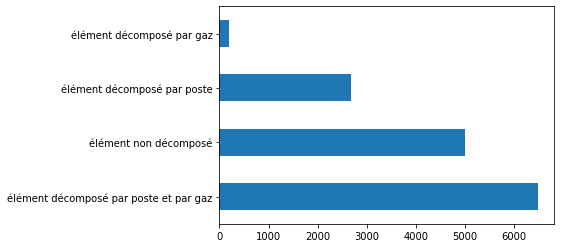

In [12]:
df["Structure"].value_counts().plot(kind='barh')

In [13]:
df["Element Status"].value_counts()

Valide générique     8074
Archivé              6154
En discussion         111
Refusé                 21
Valide spécifique      20
Name: Element Status, dtype: int64

### The element status columns gives more detail around the data points which are actually valid and useful

In [14]:
df["Franch base name"].value_counts()

Réseau de chaleur                                      1202
Électricité                                             427
Voiture particulière                                    312
Poid lourd                                              266
Papier                                                  240
                                                       ... 
Tableau électrique                                        1
Bureau 1600x800                                           1
Eau du robinet (région parisienne) avec utilisation       1
Maintenance multitechnique                                1
R245fa                                                    1
Name: Franch base name, Length: 1040, dtype: int64

### Lets build a taxonomy

In [15]:
df["Cat_id"] = df["Category code"].astype('category').cat.codes

In [16]:
df["Category_code_explode"] = df["Category code"].str.split(">")

In [17]:
df["Category_code_explode"].str.len().max()

6

Generate new columns and clean up emmpty leaing and trailing spaces

In [18]:
df["Cat_1"] = df["Category_code_explode"].str[0].str.strip()
df["Cat_2"] = df["Category_code_explode"].str[1].str.strip()
df["Cat_3"] = df["Category_code_explode"].str[2].str.strip()
df["Cat_4"] = df["Category_code_explode"].str[3].str.strip()
df["Cat_5"] = df["Category_code_explode"].str[4].str.strip()
df["Cat_6"] = df["Category_code_explode"].str[5].str.strip()

In [19]:
df.head()

,Line type,Elemnt id,Structure,Element Status,Franch base name,French Attribute name,Other french name,Category code,French Tags,French Unit,Contributor,Program,Program url,Source,Location,sub location,creation date,last update date,validity period,Uncertainty,Reglementations,Transparency,Quality,Quality TeR,Quality GR,Quality TiR,Quality C,Quality P,Quality M,French comment,Emission Type,French emission type name,unaggregated total,CO2f,CH4f,CH4b,N2O,Additional gaz 1,Additional gaz value 1,Additional gaz 2,Additional gaz value 2,Additional gaz 3,Additional gaz value 3,Additional gaz 4,Additional gaz value 4,Additional gaz 5,Additional gaz value 5,Other Greenhouse Gas,CO2b,Cat_id,Category_code_explode,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,3.53e-01,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,0.34,3.44e-01,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amont,NaN,0.03,9.70e-03,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4278.00,4.09e+03,189.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,Octobre 2014,Octobre 2014,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,3977.00,3.98e+03,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN


In [20]:
df["Cat_1"].value_counts()

Achats de biens                   3899
Combustibles                      1938
Statistiques territoriales        1622
Traitement des déchets            1478
Transport de marchandises         1330
Electricité                       1286
Réseaux de chaleur / froid        1240
Transport de personnes             949
Process et émissions fugitives     243
UTCF                               199
PRG                                137
Achats de services                  59
Name: Cat_1, dtype: int64

In [21]:
df.describe(include="object")

,Line type,Structure,Element Status,Franch base name,French Attribute name,Other french name,Category code,French Tags,French Unit,Contributor,Program,Program url,Source,Location,sub location,creation date,last update date,validity period,Uncertainty,Reglementations,Transparency,Quality,Quality TeR,Quality GR,Quality TiR,Quality C,Quality P,Quality M,French comment,Emission Type,French emission type name,Additional gaz 1,Category_code_explode,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6
count,14380,14380,14380,14380,13160,6710,14380,9549,14304,14365,6110,3995,4517,14380,14378,14380,14050,10998,12301,5218,3759,2970,2837,2837,2837,2837,2837,2837,2021,7160,4680,327,14380,14380,14380,13161,8422,3029,626
unique,2,4,5,1040,2108,164,336,2668,305,23,18,16,34,5,962,20,27,34,35,6,4,20,5,5,5,5,5,5,284,22,111,2,336,12,74,142,101,36,10
top,Elément,élément décomposé par poste et par gaz,Valide générique,Réseau de chaleur,plats prêt à manger,consommation,Electricité > Mix réseau électrique > France c...,Electricité France continentale,kgCO2e/kWh,ADEME,AGRIBALYSE,http://www2.ademe.fr/servlet/KBaseShow?sort=-1...,www.ademe.fr/agribalyse,France continentale,France continentale,Novembre 2014,Novembre 2014,Décembre 2017,30%,Données de l'article L229-25 de la loi TECV,4/4,2.8/4,Suffisante/acceptable,Très bonne,Très bonne,Suffisante/acceptable,Peu suffisante,Suffisante/acceptable,<p>L'amont comprend ici : l'amont des combusti...,Amont,gazole,Divers,"[Electricité , Mix réseau électrique , Franc...",Achats de biens,Produits de l'agriculture et de la pêche,France continentale,Archive (Valeurs obsolètes),Plastiques,Essence
freq,7220,6493,8074,1202,476,1137,592,587,2545,12143,1843,1366,1178,11205,8161,7029,5928,3441,4601,4631,2750,945,1249,1334,1025,1302,1678,1379,760,1356,318,264,592,3899,1877,1163,843,374,108


In [22]:
df.Location.value_counts()

France continentale    11205
Outre-mer               1717
Monde                    693
Autre pays du monde      423
Europe                   342
Name: Location, dtype: int64

### Clean up the dates

In [23]:
df["creation date"].value_counts()

Novembre 2014     7029
Octobre 2014      1596
Decembre 2018     1058
Juillet 2015      1026
Juin 2016          886
Decembre 2017      678
Septembre 2019     675
Septembre 2018     324
Juin 2017          297
Mars 2015          281
Novembre 2019      185
Mars 2019          114
Février 2016        86
Decembre 2016       68
Mai 2016            36
Juin 2019           15
Septembre 2017      10
Juin 2015            7
Février 2018         6
Avril 2019           3
Name: creation date, dtype: int64

In [24]:
month_transform_dict = {"Novembre": "November", "Octobre": "October", "Decembre": "December", "Juillet": "July", 
                        "Juin": "June", "Septembre": "September", "Mars": "March", "Février": "February", 
                        "Mai": "May", "Avril": "April"}

In [25]:
df["creation date"] = df["creation date"].str.split(" ").str[1] +"/"+ df["creation date"].str.split(" ").str[0].map(month_transform_dict)

In [26]:
df["creation date"].value_counts()

2014/November     7029
2014/October      1596
2018/December     1058
2015/July         1026
2016/June          886
2017/December      678
2019/September     675
2018/September     324
2017/June          297
2015/March         281
2019/November      185
2019/March         114
2016/February       86
2016/December       68
2016/May            36
2019/June           15
2017/September      10
2015/June            7
2018/February        6
2019/April           3
Name: creation date, dtype: int64

In [27]:
df["creation_date_format"] = pd.to_datetime(df['creation date'], infer_datetime_format=True).dt.strftime("%m/%d/%Y, %H:%M:%S")

In [28]:
df["last update date"] = df["last update date"].str.split(" ").str[1] +"/"+ df["last update date"].str.split(" ").str[0].map(month_transform_dict)

In [29]:
df["update_date_format"] = pd.to_datetime(df['last update date'], infer_datetime_format=True).dt.strftime("%m/%d/%Y, %H:%M:%S")

In [30]:
df.head()

,Line type,Elemnt id,Structure,Element Status,Franch base name,French Attribute name,Other french name,Category code,French Tags,French Unit,Contributor,Program,Program url,Source,Location,sub location,creation date,last update date,validity period,Uncertainty,Reglementations,Transparency,Quality,Quality TeR,Quality GR,Quality TiR,Quality C,Quality P,Quality M,French comment,Emission Type,French emission type name,unaggregated total,CO2f,CH4f,CH4b,N2O,Additional gaz 1,Additional gaz value 1,Additional gaz 2,Additional gaz value 2,Additional gaz 3,Additional gaz value 3,Additional gaz 4,Additional gaz value 4,Additional gaz 5,Additional gaz value 5,Other Greenhouse Gas,CO2b,Cat_id,Category_code_explode,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,creation_date_format,update_date_format
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,3.53e-01,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00"
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,0.34,3.44e-01,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00"
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amont,NaN,0.03,9.70e-03,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00"
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4278.00,4.09e+03,189.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00"
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,3977.00,3.98e+03,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00"


In [31]:
df["validity period"] = df["validity period"].str.split(" ").str[1] +"/"+ df["validity period"].str.split(" ").str[0].map(month_transform_dict)
df["validity period_format"] = pd.to_datetime(df['validity period'], infer_datetime_format=True).dt.strftime("%m/%d/%Y, %H:%M:%S")

Insert into database via API

In [32]:
import requests
url = "http://127.0.0.1:8000"

In [33]:
df.columns

Index(['Line type', 'Elemnt id', 'Structure', 'Element Status',
       'Franch base name', 'French Attribute name', 'Other french name',
       'Category code', 'French Tags', 'French Unit', 'Contributor', 'Program',
       'Program url', 'Source', 'Location', 'sub location', 'creation date',
       'last update date', 'validity period', 'Uncertainty', 'Reglementations',
       'Transparency', 'Quality', 'Quality TeR', 'Quality GR', 'Quality TiR',
       'Quality C', 'Quality P', 'Quality M', 'French comment',
       'Emission Type', 'French emission type name', 'unaggregated total',
       'CO2f', 'CH4f', 'CH4b', 'N2O', 'Additional gaz 1',
       'Additional gaz value 1', 'Additional gaz 2', 'Additional gaz value 2',
       'Additional gaz 3', 'Additional gaz value 3', 'Additional gaz 4',
       'Additional gaz value 4', 'Additional gaz 5', 'Additional gaz value 5',
       'Other Greenhouse Gas', 'CO2b', 'Cat_id', 'Category_code_explode',
       'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Ca

In [34]:
df.rename(columns={'Line type': 'line_type', 'Elemnt id': 'elemnt_id', 'Structure': 'structure', 
                   'Element Status': 'element_status', 'Franch base name': 'franch_base_name',
                   'French Attribute name': 'french_attribute_name','Other french name': 'other_french_name',
                   'Category code': 'category_code','French Tags': 'french_tags','French Unit': 'french_unit',
                   'Contributor': 'contributor','Program': 'program','Program url': 'program_url',
                   'Source': 'source','Location': 'location','sub location': 'sub_location',
                   'creation date': 'creation_date','last update date': 'last_update_date','validity period': 'validity_period',
                   'Uncertainty': 'uncertainty','Reglementations': 'reglementations','Transparency': 'transparency',
                   'Quality': 'quality','Quality TeR': 'quality_TeR','Quality GR': 'quality_GR','Quality TiR': 'quality_TiR',
                   'Quality C': 'quality_C','Quality P': 'quality_P','Quality M': 'quality_M','French comment': 'french_comment',
                   'Emission Type': 'emission_type','French emission type name': 'french_emission_type_name','unaggregated total': 'unaggregated_total',
                   'CO2f': 'CO2f','CH4f': 'CH4f','CH4b': 'CH4b','N2O': 'N2O','Additional gaz 1': 'additional_gaz_1',
                   'Additional gaz value 1': 'additional_gaz_value_1','Additional gaz 2': 'additional_gaz_2',
                   'Additional gaz value 2': 'additional_gaz_value_2','Additional gaz 3': 'additional_gaz_3',
                   'Additional gaz value 3': 'additional_gaz_value_3','Additional gaz 4': 'additional_gaz_4',
                   'Additional gaz value 4': 'additional_gaz_value_4','Additional gaz 5': 'additional_gaz_5',
                   'Additional gaz value 5': 'additional_gaz_value_5','Other Greenhouse Gas': 'other_greenhouse_gas',
                   'CO2b': 'CO2b','Category_code_explode': 'category_code_explode','Cat_1': 'cat_1','Cat_2': 'cat_2',
                   'Cat_3': 'cat_3','Cat_4': 'cat_4','Cat_5': 'cat_5','Cat_6': 'cat_6',
                   'creation_date_format': 'creation_date_format','update_date_format': 'update_date_format',
                   'validity period_format': 'validity_period_format','Cat_id': 'cat_id'}, inplace=True)

In [35]:
df.head()

,line_type,elemnt_id,structure,element_status,franch_base_name,french_attribute_name,other_french_name,category_code,french_tags,french_unit,contributor,program,program_url,source,location,sub_location,creation_date,last_update_date,validity_period,uncertainty,reglementations,transparency,quality,quality_TeR,quality_GR,quality_TiR,quality_C,quality_P,quality_M,french_comment,emission_type,french_emission_type_name,unaggregated_total,CO2f,CH4f,CH4b,N2O,additional_gaz_1,additional_gaz_value_1,additional_gaz_2,additional_gaz_value_2,additional_gaz_3,additional_gaz_value_3,additional_gaz_4,additional_gaz_value_4,additional_gaz_5,additional_gaz_value_5,other_greenhouse_gas,CO2b,cat_id,category_code_explode,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,creation_date_format,update_date_format,validity_period_format
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,3.53e-01,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",NaN
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,0.34,3.44e-01,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",NaN
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amont,NaN,0.03,9.70e-03,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",NaN
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4278.00,4.09e+03,189.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",NaN
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,ADEME,NaN,NaN,NaN,France continentale,France continentale,2014/October,2014/October,NaN,10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Combustion,NaN,3977.00,3.98e+03,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,NaN,NaN,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",NaN


In [36]:
new_df = df.fillna(np.nan).replace([np.nan], [None])

In [37]:
new_df.head()

,line_type,elemnt_id,structure,element_status,franch_base_name,french_attribute_name,other_french_name,category_code,french_tags,french_unit,contributor,program,program_url,source,location,sub_location,creation_date,last_update_date,validity_period,uncertainty,reglementations,transparency,quality,quality_TeR,quality_GR,quality_TiR,quality_C,quality_P,quality_M,french_comment,emission_type,french_emission_type_name,unaggregated_total,CO2f,CH4f,CH4b,N2O,additional_gaz_1,additional_gaz_value_1,additional_gaz_2,additional_gaz_value_2,additional_gaz_3,additional_gaz_value_3,additional_gaz_4,additional_gaz_value_4,additional_gaz_5,additional_gaz_value_5,other_greenhouse_gas,CO2b,cat_id,category_code_explode,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,creation_date_format,update_date_format,validity_period_format
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,None,None,Combustibles > Fossiles > Solides > Charbons,None,kgCO2e/kWh PCI,ADEME,None,None,None,France continentale,France continentale,2014/October,2014/October,None,10%,None,None,None,None,None,None,None,None,None,None,None,None,0.37,0.35,0.02,0.0,0.0,None,None,None,None,None,None,None,None,None,None,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,None,None,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",None
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,None,None,Combustibles > Fossiles > Solides > Charbons,None,kgCO2e/kWh PCI,ADEME,None,None,None,France continentale,France continentale,2014/October,2014/October,None,10%,None,None,None,None,None,None,None,None,None,None,Combustion,None,0.34,0.34,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,None,None,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",None
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,None,None,Combustibles > Fossiles > Solides > Charbons,None,kgCO2e/kWh PCI,ADEME,None,None,None,France continentale,France continentale,2014/October,2014/October,None,10%,None,None,None,None,None,None,None,None,None,None,Amont,None,0.03,0.01,0.02,0.0,0.0,None,None,None,None,None,None,None,None,None,None,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,None,None,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",None
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,None,None,Combustibles > Fossiles > Solides > Charbons,None,kgCO2e/tep PCI,ADEME,None,None,None,France continentale,France continentale,2014/October,2014/October,None,10%,None,None,None,None,None,None,None,None,None,None,None,None,4278.0,4089.0,189.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,None,None,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",None
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,None,None,Combustibles > Fossiles > Solides > Charbons,None,kgCO2e/tep PCI,ADEME,None,None,None,France continentale,France continentale,2014/October,2014/October,None,10%,None,None,None,None,None,None,None,None,None,None,Combustion,None,3977.0,3977.0,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,0.0,0.0,98,"[Combustibles , Fossiles , Solides , Charbons]",Combustibles,Fossiles,Solides,Charbons,None,None,"10/01/2014, 00:00:00","10/01/2014, 00:00:00",None


In [38]:
del new_df["category_code_explode"]

In [39]:
# new_df.to_csv('clean_data.csv',encoding='utf-8-sig', index=False)

In [182]:
for idx,row in new_df.iterrows():
#     print(row.to_dict())
#     sys.exit()
    res = requests.post(url+"/ef/", json=row.to_dict(), headers={'Content-Type': 'application/json; charset=utf-8'})
    if res.status_code != 200:
        print(idx)
        print(res.json())
    pass